In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
path = 'eeg_data.csv'
D = 178

In [4]:
data = pd.read_csv(path)

In [5]:
data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,15,16,12,5,-1,-18,-37,-47,-48,2
11496,-47,-11,28,77,141,211,246,240,193,136,...,-65,-33,-7,14,27,48,77,117,170,1
11497,14,6,-13,-16,10,26,27,-9,4,14,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,-40,-25,-9,-12,-2,12,7,19,22,29,...,121,135,148,143,116,86,68,59,55,3


In [6]:
X = np.array(data.iloc[:,:D])
y = np.array(data.iloc[:, D])
yy = list(y)
y = y.reshape(y.shape[0], 1)
print(X.shape, y.shape)

(11500, 178) (11500, 1)


In [7]:
for i in range(1, 6):
    print(yy.count(i))

2300
2300
2300
2300
2300


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [9]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

In [10]:
y

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [12]:
X_train.shape

(10350, 178)

In [13]:
lam = tf.keras.regularizers.l2(l=0.01)
init = tf.initializers.he_normal()
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_dim=178, kernel_initializer=init, kernel_regularizer=lam),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Dense(256, kernel_initializer=init, kernel_regularizer=lam),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Dense(32, kernel_initializer=init, kernel_regularizer=lam),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dropout(0.1),

    # tf.keras.layers.Dense(32, kernel_initializer=init, kernel_regularizer=lam),
    # # tf.keras.layers.BatchNormalization(),
    # tf.keras.layers.ReLU(),
    # tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Dense(5, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               22912     
_________________________________________________________________
re_lu (ReLU)                 (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                8

In [14]:
opt = tf.keras.optimizers.SGD(learning_rate=0.01)
# reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.001)
# early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [15]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, shuffle=True)

Epoch 1/100
292/292 [==============================] - 7s 15ms/step - loss: 9.6616 - accuracy: 0.2609 - val_loss: 8.7633 - val_accuracy: 0.3971
Epoch 2/100
292/292 [==============================] - 2s 7ms/step - loss: 8.5371 - accuracy: 0.4016 - val_loss: 7.8758 - val_accuracy: 0.4512
Epoch 3/100
292/292 [==============================] - 2s 6ms/step - loss: 7.6898 - accuracy: 0.4350 - val_loss: 7.1033 - val_accuracy: 0.4667
Epoch 4/100
292/292 [==============================] - 2s 6ms/step - loss: 6.9372 - accuracy: 0.4673 - val_loss: 6.4239 - val_accuracy: 0.5005
Epoch 5/100
292/292 [==============================] - 2s 6ms/step - loss: 6.2684 - accuracy: 0.4999 - val_loss: 5.8174 - val_accuracy: 0.5150
Epoch 6/100
292/292 [==============================] - 2s 6ms/step - loss: 5.6737 - accuracy: 0.5303 - val_loss: 5.2783 - val_accuracy: 0.5304
Epoch 7/100
292/292 [==============================] - 2s 6ms/step - loss: 5.1610 - accuracy: 0.5336 - val_loss: 4.7975 - val_accuracy: 0.534

In [16]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 66.52173913043478


<AxesSubplot:>

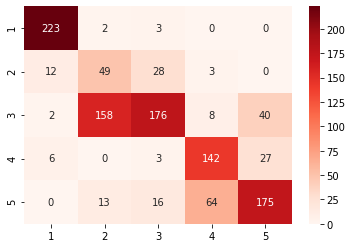

In [18]:
sns.heatmap(confusion_matrix(pred, test), annot=True, fmt='g', cmap="Reds", xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
sns.heatmap(precision_recall_fscore_support(pred, test)[:3], annot=True, fmt='g', cmap="Reds", xticklabels=[1, 2, 3, 4, 5], yticklabels=['Precision', 'Recall', 'F1-score'])

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()